In [234]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from ani2x import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [218]:
df_gen.Resolution.quantile(0.5)

2.0

In [219]:
consts_aescore = get_consts_aescore()

In [221]:
consts_ani2x = get_consts_ani2x()

In [226]:
get_aev_computer(consts_ani2x).aev_length

1008

In [227]:
get_aev_computer(consts_aescore).aev_length

270

In [233]:
print('H', 'C', 'N', 'O', 'S', 'F', 'Cl', sep=', ')

H, C, N, O, S, F, Cl


In [228]:
consts_aescore

{'Rcr': 5.2,
 'Rca': 5.2,
 'EtaR': tensor([16.]),
 'ShfR': tensor([0.9000, 1.1688, 1.4375, 1.7062, 1.9750, 2.2438, 2.5125, 2.7812, 3.0500,
         3.3187, 3.5875, 3.8563, 4.1250, 4.3938, 4.6625, 4.9313]),
 'EtaA': tensor([3.5000]),
 'Zeta': tensor([32.]),
 'ShfA': tensor([0]),
 'ShfZ': tensor([0.0000, 3.1416]),
 'num_species': 10}

In [231]:
{**consts_ani2x}

{'Rcr': 5.1,
 'Rca': 3.5,
 'EtaR': tensor([19.7000]),
 'ShfR': tensor([0.8000, 1.0688, 1.3375, 1.6063, 1.8750, 2.1437, 2.4125, 2.6813, 2.9500,
         3.2188, 3.4875, 3.7562, 4.0250, 4.2937, 4.5625, 4.8313]),
 'EtaA': tensor([12.5000]),
 'Zeta': tensor([14.1000]),
 'ShfA': tensor([0.8000, 1.1375, 1.4750, 1.8125, 2.1500, 2.4875, 2.8250, 3.1625]),
 'ShfZ': tensor([0.3927, 1.1781, 1.9635, 2.7489]),
 'num_species': 7}

In [287]:
losses_pre_train = get_losses('_mask_lig', 'pre', 'train')
losses_rand_train = get_losses('_mask_lig', 'rand', 'train')
losses_pre_valid = get_losses('_mask_lig', 'pre', 'valid')
losses_rand_valid = get_losses('_mask_lig', 'rand', 'valid')

In [283]:
losses_pre_train = get_losses('', 'pre', 'train')
losses_rand_train = get_losses('', 'rand', 'train')
losses_pre_valid = get_losses('', 'pre', 'valid')
losses_rand_valid = get_losses('', 'rand', 'valid')

In [269]:
losses_pre_valid.min(), losses_rand_valid.min(), losses_pre_valid.min()/ losses_rand_valid.min()

(1.7278303938701591, 1.8966444908110223, 0.910993284319363)

In [270]:
losses_pre_valid.min(), losses_rand_valid.min(), losses_pre_valid.min()/ losses_rand_valid.min()

(1.7278303938701591, 1.8966444908110223, 0.910993284319363)

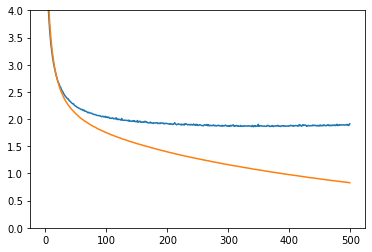

In [271]:
plt.plot(losses_pre_valid.mean(axis=0))
plt.plot(losses_pre_train.mean(axis=0));
plt.ylim(0, 4);

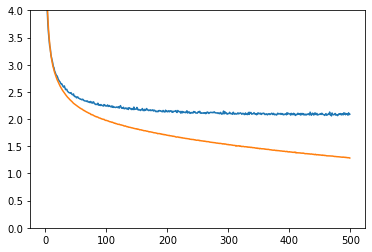

In [272]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_rand_train.mean(axis=0));
plt.ylim(0, 4);

In [300]:
df_bind

NameError: name 'df_bind' is not defined

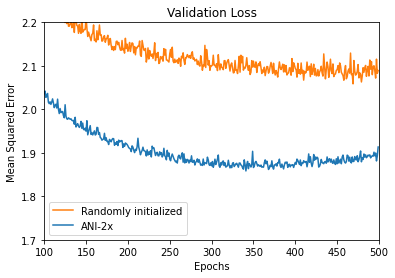

In [299]:
plt.plot(losses_rand_valid.mean(axis=0), label='Randomly initialized', color='C1')
plt.plot(losses_pre_valid.mean(axis=0), label='ANI-2x', color='C0')
plt.ylim(1.7, 2.2);
plt.xlim(100, 500);
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.savefig('./validation_curves.png', dpi=300)

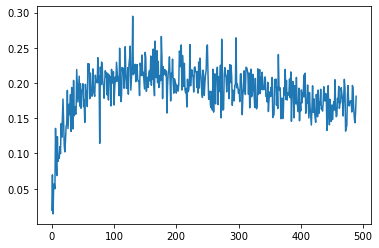

In [212]:
plt.plot(losses_rand_valid.mean(axis=0)[10:] - losses_pre_valid.mean(axis=0)[10:]);

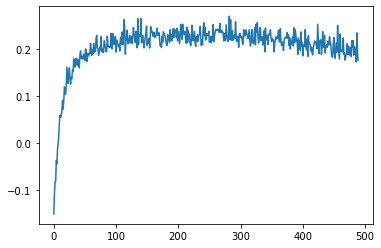

In [277]:
plt.plot(losses_rand_valid.mean(axis=0)[10:] - losses_pre_valid.mean(axis=0)[10:]);

(120.0, 500.0)

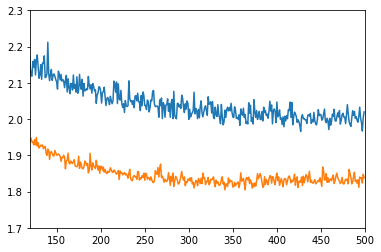

In [213]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_pre_valid.mean(axis=0));
plt.ylim(1.7, 2.3);
plt.xlim(120, 500)

(120.0, 500.0)

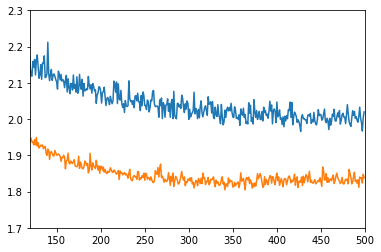

In [240]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_pre_valid.mean(axis=0));
plt.ylim(1.7, 2.3);
plt.xlim(120, 500)

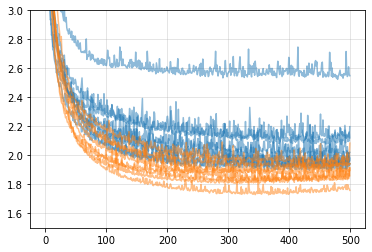

In [279]:
for loss in losses_rand_valid:
    plt.plot(loss, color='C0', alpha=0.5)
for loss in losses_pre_valid:
    plt.plot(loss, color='C1', alpha=0.5)
plt.grid(alpha=0.4)
plt.ylim(1.5, 3);

In [293]:
mins = pd.DataFrame({'ANI-2x': losses_pre_valid.min(axis=1), 'Randomly Initialized': losses_rand_valid.min(axis=1)})
mins = mins.melt(var_name='Model', value_name='Min_Loss')

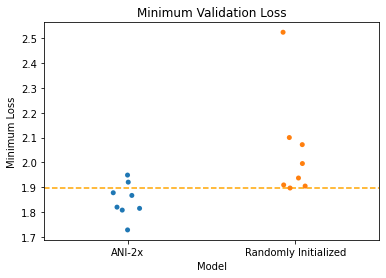

In [296]:
import seaborn as sns
sns.stripplot(data=mins, y='Min_Loss', x='Model')
plt.ylabel('Minimum Loss')
plt.axhline(y=losses_rand_valid.min(), color='orange', linestyle='--')
plt.title('Minimum Validation Loss')
plt.savefig('./minimum_loss.png', dpi=300)

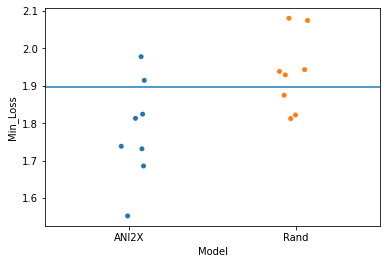

In [282]:
import seaborn as sns
sns.stripplot(data=mins, y='Min_Loss', x='Model')
plt.axhline(y=losses_rand_valid.min())

In [198]:
losses_pre_valid.min(axis=1)

array([1.87753435, 1.72783039, 1.92030294, 1.8076953 , 1.81467951,
       1.9487596 , 1.81960704, 1.86679689])

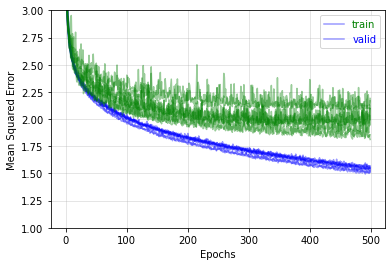

In [262]:
for loss in losses_rand_train:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_rand_valid:
    plt.plot(loss, color='green', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(1, 3);
plt.ylabel('Mean Squared Error')
plt.xlabel('Epochs')
plt.legend(labelcolor=['green', 'blue'], labels=['train', 'valid'])

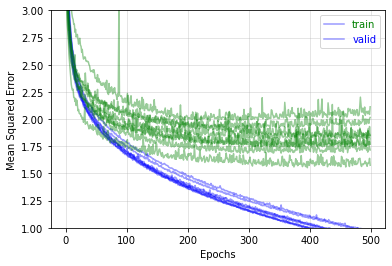

In [266]:
for loss in losses_pre_train:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_pre_valid:
    plt.plot(loss, color='green', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(1, 3);
plt.ylabel('Mean Squared Error')
plt.xlabel('Epochs')
plt.legend(labelcolor=['green', 'blue'], labels=['train', 'valid'])

In [199]:
losses_pre_valid.min(axis=1).mean() / losses_rand_valid.min(axis=1).mean()

0.9048491250827966

In [200]:
losses_pre_valid.min() / losses_rand_valid.min()

0.910993284319363

In [84]:
np.mean([np.min(loss) for loss in losses_pre_valid]) / np.mean([np.min(loss) for loss in losses_rand_valid])

0.9048491250827966

In [88]:
model_pres = [load_best_model(id_=i, kind='pre', name='mask_lig') for i in range(N_MODELS)]
model_rands = [load_best_model(id_=i, kind='rand',  name='mask_lig') for i in range(N_MODELS)]

In [ ]:
data_casf = load_pdb_bind_filtered(filter_out_casf=False, mask_function=mask_ligands)

In [89]:
consts_ani2x = get_consts_ani2x()
aev_computer_ani2x = get_aev_computer(consts_ani2x)

/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/torch/functional.py:1069: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1640812094853/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.cartesian_prod(tensors)  # type: ignore[attr-defined]


In [90]:
n_casf = len(data_casf)

In [164]:
testloader = get_data_loader(dataset=data_casf, batchsize=n_casf, shuffle=False)

In [166]:
output_pres = [get_model_output(model_pres[i], aev_computer_ani2x, testloader) for i in range(N_MODELS)]
output_rands = [get_model_output(model_rands[i], aev_computer_ani2x, testloader) for i in range(N_MODELS)]

In [169]:
output_pres = np.array(output_pres)
output_rands = np.array(output_rands)
output_pres_mean = output_pres.mean(axis=0)
output_rands_mean = output_rands.mean(axis=0)
labels = get_labels(testloader)

In [170]:
np.corrcoef(output_rands)

array([[1.        , 0.9794591 , 0.98152191, 0.98172414, 0.98537219,
        0.98006698, 0.98120485, 0.9840536 ],
       [0.9794591 , 1.        , 0.97587967, 0.97597111, 0.97856671,
        0.97840918, 0.97743201, 0.97870538],
       [0.98152191, 0.97587967, 1.        , 0.97717616, 0.98094634,
        0.97614876, 0.98411045, 0.9803604 ],
       [0.98172414, 0.97597111, 0.97717616, 1.        , 0.98626926,
        0.97920527, 0.9787039 , 0.98209585],
       [0.98537219, 0.97856671, 0.98094634, 0.98626926, 1.        ,
        0.98168431, 0.98227059, 0.98289599],
       [0.98006698, 0.97840918, 0.97614876, 0.97920527, 0.98168431,
        1.        , 0.97980565, 0.97872602],
       [0.98120485, 0.97743201, 0.98411045, 0.9787039 , 0.98227059,
        0.97980565, 1.        , 0.9799933 ],
       [0.9840536 , 0.97870538, 0.9803604 , 0.98209585, 0.98289599,
        0.97872602, 0.9799933 , 1.        ]])

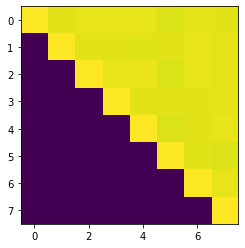

In [171]:
plt.imshow(np.triu(np.corrcoef(output_pres)))

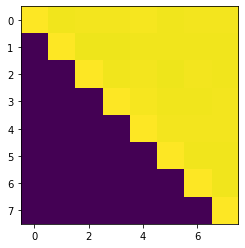

In [172]:
plt.imshow(np.triu(np.corrcoef(output_rands)))

In [189]:
get_corr(output_rands_mean, labels)

0.8014816138746936

In [190]:
get_corr(output_pres_mean, labels)

0.8020412422292666

In [188]:
get_corr(output_pres_mean, labels) - get_corr(output_rands_mean, labels)

0.0005596283545730163

In [ ]:
get_corr(output_pres_mean, labels) - np.mean([get_corr(output_pres[i], labels) for i in range(N_MODELS)]), get_corr(output_rands_mean, labels) - np.mean([get_corr(output_rands[i], labels) for i in range(N_MODELS)])

(0.015116395969985708, 0.006955469088782529)

In [115]:
df_gen = load_df_gen()

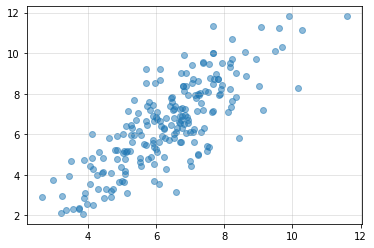

In [192]:
plt.scatter(output_pres_mean, labels, alpha=0.5)
plt.grid(alpha=0.4); 

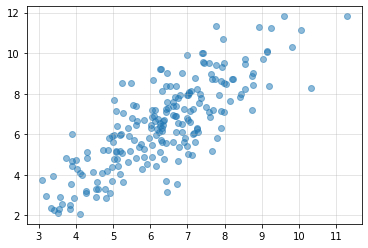

In [193]:
plt.scatter(output_rands_mean, labels, alpha=0.5)
plt.grid(alpha=0.4);

In [194]:
diff = pd.Series(np.square(output_pres_mean - labels) - np.square(output_rands_mean - labels), 
    index=[df_gen[df_gen.ID == entry['ID']].index[0] for entry in data_casf])

In [195]:
diff.nlargest(10)

1SQA    3.809283
2WBG    3.662179
4DLD    2.989345
2YKI    2.810094
4QAC    2.795628
3BV9    2.769524
2XB8    2.294569
2FVD    1.901849
3IVG    1.796384
1SYI    1.766953
dtype: float64

In [196]:
df_gen[df_gen.index.isin(set(diff.nlargest(10).index))]

,Resolution,Release_Year,pK,Binding_Type,Binding_Symbol,Ligand,Refined,R_factor,R_free,delta_R,ID,CASF_2016
PDB_ID,,,,,,,,,,,,
3IVG,1.95,2009,4.30,Kd,=,FG5,True,0.175,0.221,0.046,2771,True
2WBG,1.85,2009,4.45,Ki,=,LGS,True,0.156,0.199,0.043,3144,True
3BV9,1.80,2008,5.36,Ki,=,6-mer,True,0.190,0.239,0.049,5924,True
1SYI,2.10,2005,5.44,Ki,=,CPW,True,0.206,0.254,0.048,6204,True
4DLD,2.00,2012,5.82,Ki,=,TZG,True,0.189,0.246,0.057,7463,True
2XB8,2.40,2010,7.59,Ki,=,XNW,True,0.160,0.206,0.046,14171,True
2FVD,1.85,2006,8.52,Ki,=,LIA,True,0.207,0.235,0.028,17195,True
1SQA,2.00,2004,9.21,Ki,=,UI1,True,0.210,0.266,0.056,18440,True
4QAC,2.10,2014,9.40,Kd,=,KK3,True,0.202,0.247,0.045,18659,True


In [126]:
df_bind = load_pdb_bind_filtered()

NameError: name 'data' is not defined

In [124]:
df_gen = get_df_gen()


In [ ]:
save_df_gen()